<a href="https://colab.research.google.com/github/marz1307/Monitoring-Player-Performance-and-Scouting-in-Football/blob/main/PLayer_position_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pandas
%cd /content/sample_data/test

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[Errno 2] No such file or directory: '/content/sample_data/test'
/content


In [ ]:
!pwd

/content


Unzipped the **data**

In [ ]:
!mkdir /content/sample_data/test
%cd /content/sample_data/test
!cp /content/drive/MyDrive/turk/Data.zip /content/sample_data
!unzip /content/sample_data/Data.zip

/content/sample_data/test
Archive:  /content/sample_data/Data.zip
   creating: Data/
  inflating: __MACOSX/._Data         
  inflating: Data/matches_Germany.csv  
  inflating: __MACOSX/Data/._matches_Germany.csv  
  inflating: Data/matches_Spain.csv  
  inflating: __MACOSX/Data/._matches_Spain.csv  
  inflating: Data/events_Spain.csv   
  inflating: __MACOSX/Data/._events_Spain.csv  
  inflating: Data/labels.csv         
  inflating: __MACOSX/Data/._labels.csv  
  inflating: Data/competitions.csv   
  inflating: __MACOSX/Data/._competitions.csv  
  inflating: Data/teams.csv          
  inflating: __MACOSX/Data/._teams.csv  
  inflating: Data/referees.csv       
  inflating: __MACOSX/Data/._referees.csv  
  inflating: Data/matches_European_Championship.csv  
  inflating: __MACOSX/Data/._matches_European_Championship.csv  
  inflating: Data/coaches.csv        
  inflating: __MACOSX/Data/._coaches.csv  
  inflating: Data/matches_Italy.csv  
  inflating: __MACOSX/Data/._matches_Italy.csv  

In [ ]:
%cd /content/sample_data/test

/content/sample_data/test


create a vector , direction .....distance to goal as magnitude and action type as a third value

Exploring the data

---
Discovered that the data size caused frequent crashes when attempting to load the feature.csv file in my IDE. As a workaround, I opted to load the data in 10,000-feature chunks.



In [ ]:
import pandas


features = pandas.read_csv('Data/features.csv',chunksize=10000)
ft  = features.get_chunk()
ft.head()

,Unnamed: 0,game_id-0,period_id-0,time_seconds-0,team_id-0,player_id-0,start_x-0,start_y-0,end_x-0,end_y-0,...,distance_covered-2,end_x_norm-2,end_y_norm-2,end_distance_to_goal-2,end_angle_to_goal-2,xdiff_sequence_pre,ydiff_sequence_pre,time_sequence_pre,xdiff_sequence_post,ydiff_sequence_post
0,0,2500089,1,2.763597,1659,9637,52.50,34.00,63.00,30.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2500089,1,4.761353,1659,8351,63.00,30.60,64.05,10.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2500089,1,5.533097,1659,9285,64.05,10.20,72.45,20.40,...,11.036757,0.60,0.45,42.137394,12.352941,11.55,-23.80,2.769500,19.95,-13.60
3,3,2500089,1,7.707561,1659,239411,72.45,20.40,35.70,19.04,...,20.427004,0.61,0.15,47.363937,1.720588,9.45,-10.20,2.946208,-27.30,-11.56
4,4,2500089,1,11.614943,1659,9637,35.70,19.04,30.45,12.24,...,13.213629,0.69,0.30,35.276940,2.393382,-28.35,8.84,6.081846,-33.60,2.04


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


After examining the data, I observed that locations are only recorded during specific actions. Consequently, I filtered the dataset based on player_id, game_id, and columns prefixed with location indicators.

In [ ]:
def filter_position_cols(ft):

    cols = ft.columns


    filtered_col = [col for col in cols
                    if col.startswith('game_id')
                    or col.startswith('player_id')
                    or col.startswith('start_x-')
                    or col.startswith('start_y-')]


    return ft[filtered_col]

In [ ]:
filtered_cols = filter_position_cols(ft)
filtered_cols.head()

NameError: ignored

In [ ]:
norm_df = filtered_cols[['game_id-0',	'player_id-0',	'start_x-0','start_y-0']]
norm_df1 = filtered_cols[['game_id-1',	'player_id-1',	'start_x-1','start_y-1']]
norm_df2= filtered_cols[['game_id-2',	'player_id-2',	'start_x-2','start_y-2']]


norm_df1.columns = ['game_id-0',	'player_id-0',	'start_x-0','start_y-0']
norm_df2.columns = ['game_id-0',	'player_id-0',	'start_x-0','start_y-0']

print(norm_df1)
print(norm_df2)

      game_id-0  player_id-0  start_x-0  start_y-0
0           NaN          NaN        NaN        NaN
1     2500089.0       9637.0      52.50      34.00
2     2500089.0       8351.0      63.00      30.60
3     2500089.0       9285.0      64.05      10.20
4     2500089.0     239411.0      72.45      20.40
...         ...          ...        ...        ...
9995  2500096.0     207164.0      60.90       8.84
9996  2500096.0     207164.0      42.00      55.76
9997  2500096.0       8192.0      59.85      40.12
9998  2500096.0     246866.0      74.55      38.76
9999  2500096.0      10252.0      56.70      31.28

[10000 rows x 4 columns]
      game_id-0  player_id-0  start_x-0  start_y-0
0           NaN          NaN        NaN        NaN
1           NaN          NaN        NaN        NaN
2     2500089.0       9637.0      52.50      34.00
3     2500089.0       8351.0      63.00      30.60
4     2500089.0       9285.0      64.05      10.20
...         ...          ...        ...        ...
9995 

***Data cleaning***

Discovered missing values in position columns. Opted to drop records with missing values due to their negligible count, as less aggressive methods like imputation might compromise data quality without significant gain.


In [ ]:
print(norm_df.isna().sum())
print(norm_df1.isna().sum())
print(norm_df2.isna().sum())

game_id-0      0
player_id-0    0
start_x-0      0
start_y-0      0
dtype: int64
game_id-0      8
player_id-0    8
start_x-0      8
start_y-0      8
dtype: int64
game_id-0      16
player_id-0    16
start_x-0      16
start_y-0      16
dtype: int64


# Data Modelling
To enhance position detection, I reorganized the table into four rows. Given that the sequence of player actions doesn’t matter, all actions are consolidated under a single column. The previous columns, such as “start_x-0,” “player_id-0,” and “start_y-0,” are deprecated and now fall under new columns, namely “start_x-0,” “player_id-0,” and “start_y-0.” This restructuring improves the clarity and efficiency of data representation for position-related analysis.


In [ ]:
print(norm_df.count())
print(norm_df1.count())
print(norm_df2.count())

game_id-0      10000
player_id-0    10000
start_x-0      10000
start_y-0      10000
dtype: int64
game_id-0      9992
player_id-0    9992
start_x-0      9992
start_y-0      9992
dtype: int64
game_id-0      9984
player_id-0    9984
start_x-0      9984
start_y-0      9984
dtype: int64


In [ ]:
norm_df = norm_df.append(norm_df1)
norm_df = norm_df.append(norm_df2)
norm_df = norm_df.dropna()


In [ ]:
norm_df.loc[norm_df['player_id-0']==9637.0].count()

game_id-0      102
player_id-0    102
start_x-0      102
start_y-0      102
dtype: int64

In [ ]:
# def ranging(player_id , game_id , interval):
#     df = norm_df[ ['start_x-0'  ,'start_y-0']].loc[(norm_df['player_id-0'] == player_id) & (norm_df['game_id-0'] == game_id-0) ]
#     df_x_min = df['start_x-0'].min()
#     df_x_max = df['start_x-0'].max()

#     start = df_x_min
#     end =  start+interval
#     data = []
#     print(end, df_x_max)

#     while end <= df_x_max:

#         range_x = range(int(start),int(end) )
#         data.append({range_x:0})



# #         range_df = range_df.append({"range":range_x , "frequency":0}, ignore_index=True)

#         # ranges =range_df.values

#         # if range_x not in ranges:
#         #     range_df = range_df.append({'range':range_x, "frequency":0} ,  ignore_index=True)
#         # else:
#         #     index = range_df.iloc[range_df'==range_x]


#         start = end
#         end =  start +interval

#     return data



In [ ]:
def replace(lis , old_item ,new_item):
  lis.remove(old_item)
  lis.append(new_item)
  return lis



```
`# This is formatted as code`
```

**Feature extraction**

Chose to create a frequency distribution class to analyze the distribution of player positions throughout the game. Utilized a class interval of 5, generating a frequency table for each individual. This table was then employed for further calculations. 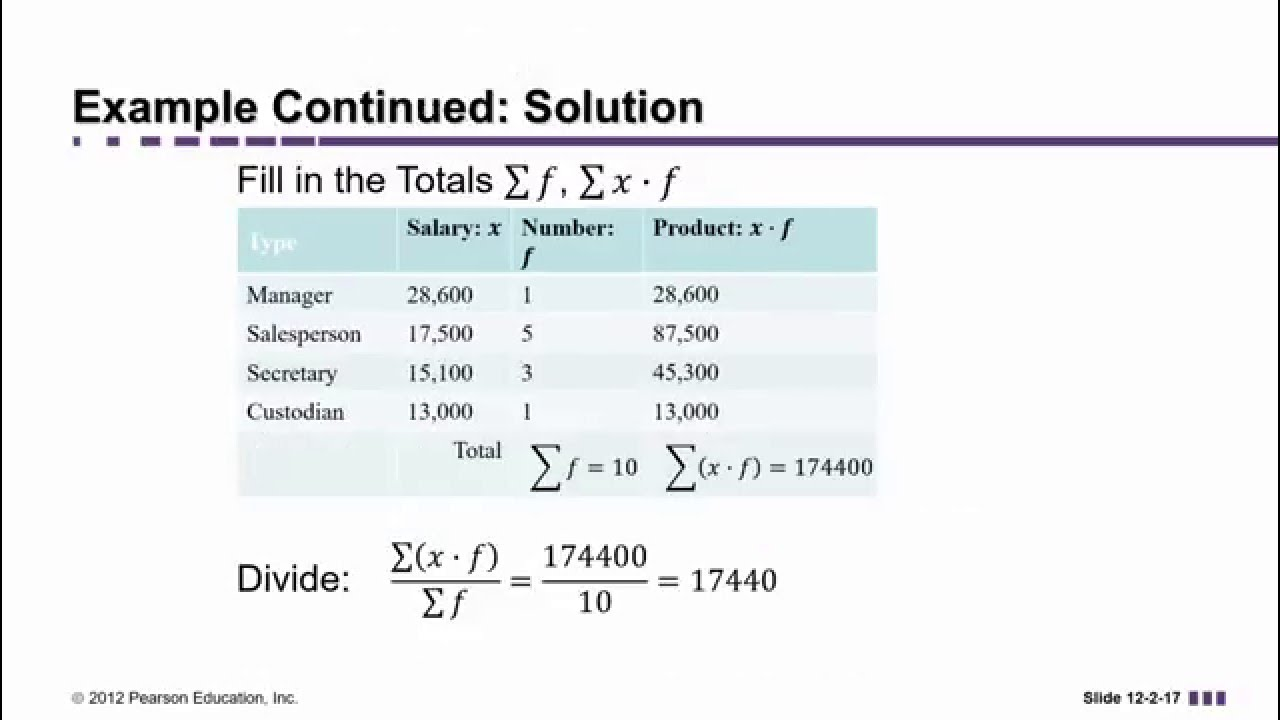



Calculated the weighted average separately for both the x and y coordinates. Although this method may be considered simplistic, it proves to be effective for this context.

In [ ]:
class freq_dist():
  def __init__(self,player_id , game_id ):
    self.df = norm_df[ ['start_x-0'  ,'start_y-0']].loc[(norm_df['player_id-0'] == player_id) & (norm_df['game_id-0'] == game_id-0) ]
    self.df_x_min = self.df['start_x-0'].min()
    self.df_x_max = self.df['start_x-0'].max()

    self.freq_table= ''
    self.generate_weighted_averagae =0
    self.data =''




  def generate_weighted_average(self, interval):

    start = self.df_x_min
    end =  start+interval
    data = []
    while end <= self.df_x_max:

        range_x = range(int(start),int(end) )
        data.append({range_x:0})



#         range_df = range_df.append({"range":range_x , "frequency":0}, ignore_index=True)

        # ranges =range_df.values

        # if range_x not in ranges:
        #     range_df = range_df.append({'range':range_x, "frequency":0} ,  ignore_index=True)
        # else:
        #     index = range_df.iloc[range_df'==range_x]


        start = end
        end =  start +interval
    for x in self.df['start_x-0']:
      for r in data:
        #print(x,list(r.keys())[0])
        key = list(r.keys())[0]
        if int(x) in key:
          r_new = r
          r_new[key] = r_new[key]+1
          replace(data , r , r_new)
    self.data = data



    return data

  def generate_frequency_table(self):
    data = {"distro":[] , "frequency":[]}
    df = pandas.DataFrame(data)
    count = 0
    print(self.data)
    for x in self.data:
      count = count +1
      maxi =  str(
          max(list(x.items())[0][0])
          )
      mini  = str(
          min(
              list(x.items())[0][0])
          )
      distro = mini +'-'+maxi

      row = {"distro":distro, "frequency":list(x.items())[0][1]}
      df = df.append(row , ignore_index=True)
    return df






In [ ]:
class freq_dist():
  def __init__(self,player_id , game_id ):
    self.df = norm_df[ ['start_x-0'  ,'start_y-0']].loc[norm_df['player_id-0'] == player_id ]
    print(self.df.count()) #& (norm_df['game_id-0'] == game_id-0) ]
    self.df_x_min = self.df['start_x-0'].min()
    self.df_x_max = self.df['start_x-0'].max()

    self.freq_table= ''
    self.generate_weighted_averagae =0
    self.data =''




  def generate_weighted_average(self, interval):

    start = self.df_x_min
    end =  start+interval
    data = []
    while end <= self.df_x_max:

        range_x = range(int(start),int(end) )
        data.append({range_x:0})



#         range_df = range_df.append({"range":range_x , "frequency":0}, ignore_index=True)

        # ranges =range_df.values

        # if range_x not in ranges:
        #     range_df = range_df.append({'range':range_x, "frequency":0} ,  ignore_index=True)
        # else:
        #     index = range_df.iloc[range_df'==range_x]


        start = end
        end =  start +interval
    for x in self.df['start_x-0']:
      for r in data:

        #print(x,list(r.keys())[0])
        key = list(r.keys())[0]
        if int(x) in key:
          r_new = r
          r_new[key] = r_new[key]+1
          replace(data , r , r_new)
    self.data = data



    return data

  def generate_frequency_table(self):
    data = {"player_position":[] , "frequency":[] , "class_midpoint":[] , "fX":[]}
    df = pandas.DataFrame(data)

    count = 0
    #print(self.data)
    for x in self.data:
      count = count +1
      maxi =  str(
          max(list(x.items())[0][0])
          )
      mini  = str(
          min(
              list(x.items())[0][0])
          )
      distro = mini +'-'+maxi
      mid = (int(mini) + int(maxi))/2
      freq = list(x.items())[0][1]

      row = {"player_position":distro, "frequency":freq,"class_midpoint":mid ,"fX": freq*mid}
      self.df = df.append(row , ignore_index=True)
    return df
  def weighted_average(self):
    avg = self.df["fX"].sum()/self.df["frequency"].sum()
    return avg







In [ ]:
x = range(10,12)
for y in x:
  print(y)
min(x)

10
11


10

In [ ]:
player = freq_dist(9637.0,2500089.0)
player.generate_weighted_average(5)
player.generate_frequency_table()
player.weighted_average()

start_x-0    102
start_y-0    102
dtype: int64


65.0

In [ ]:
vals  = [3,3,4,93,92,1]

##### **Remember to explore clustering of feature engineered positions**

In [ ]:
import pandas


features = pandas.read_csv('Data/features.csv',usecols =['game_id-0'] )

## **Role Detector**

In [ ]:
import pandas as pd
features= pd.read_csv('/content/sample_data/test/Data/features.csv' , chunksize=10000)
ft = features.get_chunk()

ft.columns

Index(['Unnamed: 0', 'game_id-0', 'period_id-0', 'time_seconds-0', 'team_id-0',
       'player_id-0', 'start_x-0', 'start_y-0', 'end_x-0', 'end_y-0',
       'bodypart_id-0', 'type_id-0', 'result_id-0', 'type_name-0',
       'result_name-0', 'bodypart_name-0', 'time_played-0', 'game_id-1',
       'period_id-1', 'time_seconds-1', 'team_id-1', 'player_id-1',
       'start_x-1', 'start_y-1', 'end_x-1', 'end_y-1', 'bodypart_id-1',
       'type_id-1', 'result_id-1', 'type_name-1', 'result_name-1',
       'bodypart_name-1', 'time_played-1', 'game_id-2', 'period_id-2',
       'time_seconds-2', 'team_id-2', 'player_id-2', 'start_x-2', 'start_y-2',
       'end_x-2', 'end_y-2', 'bodypart_id-2', 'type_id-2', 'result_id-2',
       'type_name-2', 'result_name-2', 'bodypart_name-2', 'time_played-2',
       'team-1', 'team-2', 'start_x_norm-0', 'start_y_norm-0',
       'start_distance_to_goal-0', 'start_angle_to_goal-0', 'diff_x-0',
       'diff_y-0', 'distance_covered-0', 'end_x_norm-0', 'end_y_norm-

In [ ]:
actions =pd.read_csv("/content/sample_data/test/Data/actions.csv" ) #, chunksize =10000)
actions.head()

,Unnamed: 0,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,result_name,bodypart_name
0,0,2500089,1,2.763597,1659,9637,52.50,34.00,63.00,30.60,251700146.0,0,0,1,0,pass,success,foot
1,1,2500089,1,4.761353,1659,8351,63.00,30.60,64.05,10.20,251700147.0,0,0,1,1,pass,success,foot
2,2,2500089,1,5.533097,1659,9285,64.05,10.20,72.45,20.40,251700148.0,0,0,1,2,pass,success,foot
3,3,2500089,1,7.707561,1659,239411,72.45,20.40,35.70,19.04,251700161.0,0,0,1,3,pass,success,foot
4,4,2500089,1,11.614943,1659,9637,35.70,19.04,30.45,12.24,251700149.0,0,0,1,4,pass,success,foot


In [ ]:
actions["type_id"].nuni()

2462726

In [ ]:
import math
def distance_points(x1,y1,x2,y2):
  x = (x2-x1)**2
  y = (y2-y1)**2
  dist  = math.sqrt(x+y)
  return dist


distance_points(52.50	,34.00,	63.00	,30.60)

11.03675676999362

In [ ]:
def test(x):
  print(x['start_x'])

In [ ]:
ac_filter = actions[['player_id', 'start_x', 'start_y', 'end_x', 'end_y', 'bodypart_id', 'type_id', 'result_id']]

In [ ]:
ac_filter["action_distance"] = ac_filter.apply(lambda x: distance_points(x['start_x'],x['start_y'],x['end_x'],x['end_y'] ),axis=1)

<ipython-input-39-1a3ad2cc49f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ac_filter["action_distance"] = ac_filter.apply(lambda x: distance_points(x['start_x'],x['start_y'],x['end_x'],x['end_y'] ),axis=1)


In [ ]:
ac_filter[['player_id','bodypart_id'	,'type_id'	,'action_distance']]

,player_id,bodypart_id,type_id,action_distance
0,9637,0,0,11.036757
1,8351,0,0,20.427004
2,9285,0,0,13.213629
3,239411,0,0,36.775156
4,9637,0,0,8.590838
...,...,...,...,...
2462721,103682,0,0,5.423292
2462722,122577,0,9,4.874433
2462723,122577,0,8,0.000000
2462724,257800,0,13,21.554306


In [ ]:
playerank = pd.read_csv("/content/sample_data/test/Data/playerank.csv")
playerank.head()

,goalScored,playerankScore,matchId,playerId,roleCluster,minutesPlayed
0,0,0.0053,2057991,10014,right CB,90
1,0,0.0009,2057992,10014,right CB,41
2,0,-0.0013,2057998,100140,central MF,90
3,0,0.0031,2058000,100140,left CB,90
4,0,0.0035,2499869,10108,right CB,90


In [ ]:
players = pd.read_csv("/content/sample_data/test/Data/players.csv")
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,NaN,Tekin,4502.0,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687.0
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,NaN,Sarr,3775.0,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423.0
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,NaN,Mandanda,3772.0,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,NaN,O. Mandanda,NaN
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,NaN,N'Diaye,683.0,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314.0
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,NaN,Konat\u00e9,2975.0,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,NaN


In [ ]:
players.wyId.loc[players.wyId==10014]

794    10014
Name: wyId, dtype: int64

In [ ]:
players = pd.read_csv("/content/sample_data/test/Data/players.csv")
players.loc[players['playerId']==10014]

KeyError: ignored

In [ ]:
players

In [ ]:
def engineer_feature(player_id ,type_id):
  ac_filter[['bodypart_id' ,'action_distance']
            ].loc[(ac_filter['player_id']==9637)&(ac_filter['type_id']==0)]


In [ ]:
ac_filter.type_id.unique()

array([ 0,  1, 18,  2, 21,  8,  3,  4, 10, 22,  7,  5, 11, 14,  9,  6, 13,
       12])

In [ ]:
ac_filter[['bodypart_id','result_id' ,'action_distance']].loc[(ac_filter['player_id']==9637)&(ac_filter['type_id']==0)].describe()


,bodypart_id,result_id,action_distance
count,14.0,14.000000,14.000000
mean,0.0,0.785714,22.802137
std,0.0,0.425815,29.956768
min,0.0,0.000000,5.540406
25%,0.0,1.000000,7.801807
50%,0.0,1.000000,10.090470
75%,0.0,1.000000,14.578724
max,0.0,1.000000,107.592402


In [ ]:
ac_filter = ac_filter.drop(["start_x"	,"start_y"	,"end_x"	,"end_y"] ,axis=1)
ac_filter.head()

,player_id,bodypart_id,type_id,result_id,action_distance
0,9637,0,0,1,11.036757
1,8351,0,0,1,20.427004
2,9285,0,0,1,13.213629
3,239411,0,0,1,36.775156
4,9637,0,0,1,8.590838


['player_id', 'start_x', 'start_y', 'end_x', 'end_y', 'bodypart_id', 'type_id', 'result_id', 'action_distance', 0, 2, 1, 3, 0, 1, 18, 2, 21, 8, 3, 4, 10, 22, 7, 5, 11, 14, 9, 6, 13, 12, 19]


ValueError: ignored

In [ ]:
ac_filter["type_id"].unique()

array([ 0,  1, 18,  2, 21,  8,  3,  4, 10, 22,  7,  5, 11, 14,  9,  6, 13,
       12])